In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [275]:
%run The_Economic_Freedom_Index.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 25 columns):
CountryName                186 non-null object
Score                      180 non-null float64
PropertyRights             185 non-null float64
JudicalEffectiveness       185 non-null float64
GovernmentIntegrity        185 non-null float64
TaxBurden                  180 non-null float64
GovtSpending               183 non-null float64
FiscalHealth               183 non-null float64
BusinessFreedom            185 non-null float64
LaborFreedom               184 non-null float64
MonetaryFreedom            184 non-null float64
TradeFreedom               182 non-null float64
InvestmentFreedom          184 non-null float64
FinancialFreedom           181 non-null float64
TariffRateprc              182 non-null float64
IncomeTaxRateprc           183 non-null float64
CorporateTaxRateprc        183 non-null float64
TaxBurdenprcofGDP          179 non-null float64
GovtExpenditureprcofGDP    182 n

In [276]:
data

,CountryName,Score,PropertyRights,JudicalEffectiveness,GovernmentIntegrity,TaxBurden,GovtSpending,FiscalHealth,BusinessFreedom,LaborFreedom,...,IncomeTaxRateprc,CorporateTaxRateprc,TaxBurdenprcofGDP,GovtExpenditureprcofGDP,PopulationMillions,GDPBillionsPPP,YearGDPGrowthRate,GDPperCapitaPPP,Unemploymentprc,Inflationprc
0,Liechtenstein,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,12.5,0.0,0.0,0.038,6.1,0.0,139100.0,2.1,0.0
1,Iraq,0.0,37.0,12.3,20.3,0.0,52.8,13.3,54.4,53.1,...,15.0,15.0,0.0,39.7,38.900,658.8,4.7,16954.0,8.2,0.1
2,Yemen,0.0,19.6,22.2,20.3,0.0,83.7,0.0,45.1,49.8,...,0.0,0.0,0.0,0.0,30.000,38.6,-16.1,1287.0,14.0,4.9
3,Syria,0.0,37.0,24.4,20.3,0.0,0.0,0.0,49.6,58.2,...,22.0,28.0,0.0,0.0,18.400,0.0,0.0,0.0,14.9,0.0
4,Somalia,0.0,33.7,26.6,7.9,0.0,0.0,0.0,31.7,0.0,...,0.0,0.0,0.0,0.0,14.300,18.7,2.2,0.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Australia,80.9,79.1,86.5,79.9,62.8,60.1,86.2,88.3,84.1,...,45.0,30.0,28.2,36.5,24.800,1246.5,2.4,50334.0,5.6,2.0
182,Switzerland,81.9,85.3,82.0,88.0,70.5,64.8,96.3,75.4,72.5,...,40.0,24.0,27.8,34.3,8.400,517.2,1.6,61422.0,4.8,0.5
183,New Zealand,84.4,95.0,83.5,96.7,71.0,50.4,98.6,91.0,86.7,...,33.0,28.0,32.1,40.7,4.800,188.6,3.3,38934.0,4.9,1.9
184,Singapore,89.4,97.4,92.4,95.1,90.4,90.7,80.0,90.8,91.0,...,22.0,17.0,13.7,17.6,5.600,527.0,3.5,93906.0,2.0,0.6


In [277]:
# Define the target and predictors
outcome = 'Score'
x_cols = list(data.columns)
x_cols.remove(outcome)

In [278]:
x_cols.remove('CountryName')

In [279]:
x_cols

['PropertyRights',
 'JudicalEffectiveness',
 'GovernmentIntegrity',
 'TaxBurden',
 'GovtSpending',
 'FiscalHealth',
 'BusinessFreedom',
 'LaborFreedom',
 'MonetaryFreedom',
 'TradeFreedom',
 'InvestmentFreedom',
 'FinancialFreedom',
 'TariffRateprc',
 'IncomeTaxRateprc',
 'CorporateTaxRateprc',
 'TaxBurdenprcofGDP',
 'GovtExpenditureprcofGDP',
 'PopulationMillions',
 'GDPBillionsPPP',
 'YearGDPGrowthRate',
 'GDPperCapitaPPP',
 'Unemploymentprc',
 'Inflationprc']

In [280]:
train, test = train_test_split(data)

In [281]:
print(len(train), len(test))
train.head()

139 47


,CountryName,Score,PropertyRights,JudicalEffectiveness,GovernmentIntegrity,TaxBurden,GovtSpending,FiscalHealth,BusinessFreedom,LaborFreedom,...,IncomeTaxRateprc,CorporateTaxRateprc,TaxBurdenprcofGDP,GovtExpenditureprcofGDP,PopulationMillions,GDPBillionsPPP,YearGDPGrowthRate,GDPperCapitaPPP,Unemploymentprc,Inflationprc
35,Niger,51.6,37.2,31.0,34.1,76.9,75.6,22.2,56.3,48.2,...,35.0,30.0,13.5,28.5,18.8,21.8,5.4,1164.0,0.4,2.4
4,Somalia,0.0,33.7,26.6,7.9,0.0,0.0,0.0,31.7,0.0,...,0.0,0.0,0.0,0.0,14.3,18.7,2.2,0.0,6.0,0.0
154,Rwanda,71.1,72.2,83.2,67.9,79.8,79.4,86.3,56.2,82.2,...,30.0,30.0,15.0,26.2,11.8,24.6,6.7,2080.0,1.3,4.8
180,Ireland,80.5,85.8,68.4,78.0,76.3,77.4,89.0,83.1,75.3,...,41.0,12.5,23.0,27.4,4.7,357.2,9.7,75538.0,6.4,0.3
23,Mozambique,48.6,33.9,35.2,28.1,75.5,66.9,16.6,57.1,42.0,...,32.0,32.0,20.2,33.2,29.5,36.7,5.6,1244.0,25.0,15.3


In [282]:
test.head()

,CountryName,Score,PropertyRights,JudicalEffectiveness,GovernmentIntegrity,TaxBurden,GovtSpending,FiscalHealth,BusinessFreedom,LaborFreedom,...,IncomeTaxRateprc,CorporateTaxRateprc,TaxBurdenprcofGDP,GovtExpenditureprcofGDP,PopulationMillions,GDPBillionsPPP,YearGDPGrowthRate,GDPperCapitaPPP,Unemploymentprc,Inflationprc
86,China,58.4,49.9,75.2,49.1,70.4,70.1,76.0,56.2,64.2,...,45.0,25.0,17.5,31.6,1390.1,23159.1,7.1,16660.0,4.7,1.6
63,Belize,55.4,41.7,46.9,27.2,79.9,65.9,39.1,61.8,54.8,...,25.0,25.0,27.6,33.7,0.4,3.2,1.8,8324.0,9.3,1.1
80,Greece,57.7,52.4,49.5,37.7,59.1,23.3,79.0,74.1,52.5,...,42.0,29.0,38.6,50.6,10.8,298.7,-0.3,27737.0,21.5,1.1
175,Iceland,77.1,87.4,63.8,83.8,72.7,44.0,96.7,88.4,64.1,...,31.8,20.0,36.4,43.2,0.3,17.6,4.4,51842.0,2.8,1.8
24,Burundi,48.9,20.6,31.0,26.2,74.0,83.3,23.3,50.3,67.5,...,35.0,35.0,12.3,23.6,10.9,8.0,1.1,735.0,1.6,16.6


In [283]:
# Fitting the training data
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     563.2
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          3.98e-107
Time:                        16:07:57   Log-Likelihood:                -248.62
No. Observations:                 139   AIC:                             545.2
Df Residuals:                     115   BIC:                             615.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -12.8970      1.502     -8.587      0.000     -15.872      -9.922
PropertyRights              0.1024      0.018      5.739      0.000       0.067       0.138
JudicalEffectiveness        0.1147      0.019      6.108      0.000       0.077       0.152
GovernmentIntegrity         0.0670      0.020      3.311      0.001       0.027       0.107
TaxBurden                   0.3012      0.016     19.138      0.000       0.270       0.332
GovtSpending                0.0401      0.014      2.900      0.004       0.013       0.067
FiscalHealth                0.0862      0.005     17.099      0.000       0.076       0.096
BusinessFreedom             0.0658      0.016      4.173      0.000       0.035       0.097
LaborFreedom                0.0705      0.012      5.731      0.000       0.046       0.095
MonetaryFreedom            -0.0606      0.021     -2.938      0.004      -0.101      -0.020
TradeFreedom                0.0822      0.020      4.130      0.000       0.043       0.122
InvestmentFreedom           0.0830      0.013      6.607      0.000       0.058       0.108
FinancialFreedom            0.1135      0.014      8.204      0.000       0.086       0.141
TariffRateprc               0.1573      0.039      4.001      0.000       0.079       0.235
IncomeTaxRateprc            0.1238      0.019      6.645      0.000       0.087       0.161
CorporateTaxRateprc         0.0690      0.023      2.937      0.004       0.022       0.116
TaxBurdenprcofGDP           0.0544      0.024      2.231      0.028       0.006       0.103
GovtExpenditureprcofGDP     0.0027      0.015      0.176      0.861      -0.028       0.033
PopulationMillions         -0.0045      0.005     -0.897      0.372      -0.015       0.005
GDPBillionsPPP           1.558e-05      0.000      0.117      0.907      -0.000       0.000
YearGDPGrowthRate           0.1821      0.060      3.032      0.003       0.063       0.301
GDPperCapitaPPP          1.449e-05   1.05e-05      1.375      0.172   -6.39e-06    3.54e-05
Unemploymentprc             0.0222      0.028      0.804      0.423      -0.033       0.077
Inflationprc               -0.0081      0.002     -3.716      0.000      -0.012      -0.004
==============================================================================
Omnibus:                       33.640   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.716
Skew:                          -0.908   Prob(JB):                     4.47e-21
Kurtosis:                       6.589   Cond. No.                     3.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition numb

In [284]:
predictors

'PropertyRights+JudicalEffectiveness+GovernmentIntegrity+TaxBurden+GovtSpending+FiscalHealth+BusinessFreedom+LaborFreedom+MonetaryFreedom+TradeFreedom+InvestmentFreedom+FinancialFreedom+TariffRateprc+IncomeTaxRateprc+CorporateTaxRateprc+TaxBurdenprcofGDP+GovtExpenditureprcofGDP+PopulationMillions+GDPBillionsPPP+YearGDPGrowthRate+GDPperCapitaPPP+Unemploymentprc+Inflationprc'

In [285]:
formula

'Score~PropertyRights+JudicalEffectiveness+GovernmentIntegrity+TaxBurden+GovtSpending+FiscalHealth+BusinessFreedom+LaborFreedom+MonetaryFreedom+TradeFreedom+InvestmentFreedom+FinancialFreedom+TariffRateprc+IncomeTaxRateprc+CorporateTaxRateprc+TaxBurdenprcofGDP+GovtExpenditureprcofGDP+PopulationMillions+GDPBillionsPPP+YearGDPGrowthRate+GDPperCapitaPPP+Unemploymentprc+Inflationprc'

In [286]:
model

In [287]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     563.2
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          3.98e-107
Time:                        16:08:22   Log-Likelihood:                -248.62
No. Observations:                 139   AIC:                             545.2
Df Residuals:                     115   BIC:                             615.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -12.8970      1.502     -8.587      0.000     -15.872      -9.922
PropertyRights              0.1024      0.018      5.739      0.000       0.067       0.138
JudicalEffectiveness        0.1147      0.019      6.108      0.000       0.077       0.152
GovernmentIntegrity         0.0670      0.020      3.311      0.001       0.027       0.107
TaxBurden                   0.3012      0.016     19.138      0.000       0.270       0.332
GovtSpending                0.0401      0.014      2.900      0.004       0.013       0.067
FiscalHealth                0.0862      0.005     17.099      0.000       0.076       0.096
BusinessFreedom             0.0658      0.016      4.173      0.000       0.035       0.097
LaborFreedom                0.0705      0.012      5.731      0.000       0.046       0.095
MonetaryFreedom            -0.0606      0.021     -2.938      0.004      -0.101      -0.020
TradeFreedom                0.0822      0.020      4.130      0.000       0.043       0.122
InvestmentFreedom           0.0830      0.013      6.607      0.000       0.058       0.108
FinancialFreedom            0.1135      0.014      8.204      0.000       0.086       0.141
TariffRateprc               0.1573      0.039      4.001      0.000       0.079       0.235
IncomeTaxRateprc            0.1238      0.019      6.645      0.000       0.087       0.161
CorporateTaxRateprc         0.0690      0.023      2.937      0.004       0.022       0.116
TaxBurdenprcofGDP           0.0544      0.024      2.231      0.028       0.006       0.103
GovtExpenditureprcofGDP     0.0027      0.015      0.176      0.861      -0.028       0.033
PopulationMillions         -0.0045      0.005     -0.897      0.372      -0.015       0.005
GDPBillionsPPP           1.558e-05      0.000      0.117      0.907      -0.000       0.000
YearGDPGrowthRate           0.1821      0.060      3.032      0.003       0.063       0.301
GDPperCapitaPPP          1.449e-05   1.05e-05      1.375      0.172   -6.39e-06    3.54e-05
Unemploymentprc             0.0222      0.028      0.804      0.423      -0.033       0.077
Inflationprc               -0.0081      0.002     -3.716      0.000      -0.012      -0.004
==============================================================================
Omnibus:                       33.640   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.716
Skew:                          -0.908   Prob(JB):                     4.47e-21
Kurtosis:                       6.589   Cond. No.                     3.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition numb

In [288]:
# run a heat map here
data.corr()

,Score,PropertyRights,JudicalEffectiveness,GovernmentIntegrity,TaxBurden,GovtSpending,FiscalHealth,BusinessFreedom,LaborFreedom,MonetaryFreedom,...,IncomeTaxRateprc,CorporateTaxRateprc,TaxBurdenprcofGDP,GovtExpenditureprcofGDP,PopulationMillions,GDPBillionsPPP,YearGDPGrowthRate,GDPperCapitaPPP,Unemploymentprc,Inflationprc
Score,1.000000,0.756877,0.736967,0.702422,0.573253,0.241808,0.612750,0.749542,0.572791,0.682868,...,0.219728,-0.005317,0.474171,-0.049734,-0.005408,0.110822,0.307737,0.370993,-0.107534,-0.174145
PropertyRights,0.756877,1.000000,0.828503,0.858950,0.096316,-0.155676,0.377722,0.785711,0.459556,0.486534,...,0.206404,-0.204010,0.534640,0.158573,0.014174,0.167538,0.093847,0.561138,-0.082242,-0.189405
JudicalEffectiveness,0.736967,0.828503,1.000000,0.881659,0.115263,-0.060131,0.366417,0.736125,0.484208,0.455131,...,0.237736,-0.119031,0.431412,0.095574,0.151502,0.285501,0.058387,0.523232,-0.023195,-0.144642
GovernmentIntegrity,0.702422,0.858950,0.881659,1.000000,0.034969,-0.210625,0.350495,0.724796,0.447922,0.445713,...,0.267521,-0.168110,0.473786,0.221668,0.031695,0.196792,0.035100,0.596355,-0.084155,-0.144260
TaxBurden,0.573253,0.096316,0.115263,0.034969,1.000000,0.469927,0.252419,0.272785,0.362114,0.397734,...,-0.301615,-0.109199,-0.028420,-0.200177,-0.002661,-0.024639,0.392437,-0.071962,-0.153049,0.004617
GovtSpending,0.241808,-0.155676,-0.060131,-0.210625,0.469927,1.000000,0.160750,-0.035678,0.156271,0.175011,...,0.009946,0.258900,-0.402901,-0.716175,0.094133,-0.005378,0.314779,-0.268949,-0.084810,0.000219
FiscalHealth,0.612750,0.377722,0.366417,0.350495,0.252419,0.160750,1.000000,0.386313,0.243721,0.391583,...,0.156873,0.035060,0.275256,-0.037972,-0.062585,-0.004142,0.205492,0.182882,-0.156734,-0.116395
BusinessFreedom,0.749542,0.785711,0.736125,0.724796,0.272785,-0.035678,0.386313,1.000000,0.567549,0.548747,...,0.105549,-0.177052,0.467457,0.089303,-0.024778,0.124016,0.077037,0.381540,0.031771,-0.147303
LaborFreedom,0.572791,0.459556,0.484208,0.447922,0.362114,0.156271,0.243721,0.567549,1.000000,0.494808,...,-0.022374,-0.012991,0.153680,-0.001134,-0.027347,0.096652,0.106441,0.146835,0.015346,-0.151025
MonetaryFreedom,0.682868,0.486534,0.455131,0.445713,0.397734,0.175011,0.391583,0.548747,0.494808,1.000000,...,0.239314,0.066395,0.411932,0.061482,-0.045031,0.022444,0.205688,0.111649,0.009904,-0.430380


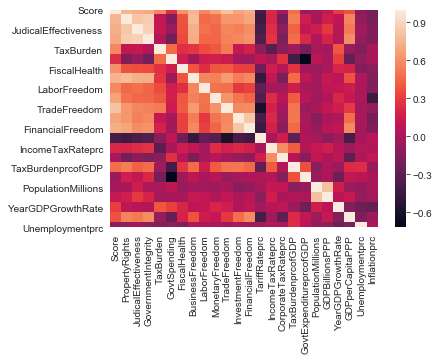

In [289]:
heat_map = sns.heatmap(data.corr())

In [290]:
# Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

24 18
['PropertyRights', 'JudicalEffectiveness', 'GovernmentIntegrity', 'TaxBurden', 'GovtSpending']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-12.8970,1.502,-8.587,0.000,-15.872,-9.922
PropertyRights,0.1024,0.018,5.739,0.000,0.067,0.138
JudicalEffectiveness,0.1147,0.019,6.108,0.000,0.077,0.152
GovernmentIntegrity,0.0670,0.020,3.311,0.001,0.027,0.107
TaxBurden,0.3012,0.016,19.138,0.000,0.270,0.332


In [291]:
p_table

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-12.8970,1.502,-8.587,0.000,-15.872,-9.922
PropertyRights,0.1024,0.018,5.739,0.000,0.067,0.138
JudicalEffectiveness,0.1147,0.019,6.108,0.000,0.077,0.152
GovernmentIntegrity,0.0670,0.020,3.311,0.001,0.027,0.107
TaxBurden,0.3012,0.016,19.138,0.000,0.270,0.332
GovtSpending,0.0401,0.014,2.900,0.004,0.013,0.067
FiscalHealth,0.0862,0.005,17.099,0.000,0.076,0.096
BusinessFreedom,0.0658,0.016,4.173,0.000,0.035,0.097
LaborFreedom,0.0705,0.012,5.731,0.000,0.046,0.095


In [292]:
# Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     723.3
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          2.99e-113
Time:                        16:09:44   Log-Likelihood:                -251.21
No. Observations:                 139   AIC:                             540.4
Df Residuals:                     120   BIC:                             596.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -12.6289      1.314     -9.614      0.000     -15.230     -10.028
PropertyRights           0.1034      0.017      6.133      0.000       0.070       0.137
JudicalEffectiveness     0.1106      0.018      6.025      0.000       0.074       0.147
GovernmentIntegrity      0.0794      0.019      4.280      0.000       0.043       0.116
TaxBurden                0.3030      0.015     19.852      0.000       0.273       0.333
GovtSpending             0.0386      0.009      4.496      0.000       0.022       0.056
FiscalHealth             0.0861      0.005     17.721      0.000       0.076       0.096
BusinessFreedom          0.0637      0.016      4.103      0.000       0.033       0.094
LaborFreedom             0.0713      0.012      5.991      0.000       0.048       0.095
MonetaryFreedom         -0.0568      0.019     -2.929      0.004      -0.095      -0.018
TradeFreedom             0.0783      0.020      4.000      0.000       0.040       0.117
InvestmentFreedom        0.0826      0.012      6.859      0.000       0.059       0.106
FinancialFreedom         0.1158      0.013      8.834      0.000       0.090       0.142
TariffRateprc            0.1489      0.037      4.032      0.000       0.076       0.222
IncomeTaxRateprc         0.1205      0.018      6.639      0.000       0.085       0.156
CorporateTaxRateprc      0.0622      0.022      2.775      0.006       0.018       0.107
TaxBurdenprcofGDP        0.0611      0.022      2.837      0.005       0.018       0.104
YearGDPGrowthRate        0.1532      0.057      2.693      0.008       0.041       0.266
Inflationprc            -0.0078      0.002     -3.692      0.000      -0.012      -0.004
==============================================================================
Omnibus:                       37.725   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.311
Skew:                          -0.957   Prob(JB):                     6.15e-28
Kurtosis:                       7.239   Cond. No.                     2.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [293]:
# Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

19 18
['PropertyRights', 'JudicalEffectiveness', 'GovernmentIntegrity', 'TaxBurden', 'GovtSpending']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-12.6289,1.314,-9.614,0.0,-15.230,-10.028
PropertyRights,0.1034,0.017,6.133,0.0,0.070,0.137
JudicalEffectiveness,0.1106,0.018,6.025,0.0,0.074,0.147
GovernmentIntegrity,0.0794,0.019,4.280,0.0,0.043,0.116
TaxBurden,0.3030,0.015,19.852,0.0,0.273,0.333


In [294]:
# Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     723.3
Date:                Wed, 15 Jan 2020   Prob (F-statistic):          2.99e-113
Time:                        16:09:48   Log-Likelihood:                -251.21
No. Observations:                 139   AIC:                             540.4
Df Residuals:                     120   BIC:                             596.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -12.6289      1.314     -9.614      0.000     -15.230     -10.028
PropertyRights           0.1034      0.017      6.133      0.000       0.070       0.137
JudicalEffectiveness     0.1106      0.018      6.025      0.000       0.074       0.147
GovernmentIntegrity      0.0794      0.019      4.280      0.000       0.043       0.116
TaxBurden                0.3030      0.015     19.852      0.000       0.273       0.333
GovtSpending             0.0386      0.009      4.496      0.000       0.022       0.056
FiscalHealth             0.0861      0.005     17.721      0.000       0.076       0.096
BusinessFreedom          0.0637      0.016      4.103      0.000       0.033       0.094
LaborFreedom             0.0713      0.012      5.991      0.000       0.048       0.095
MonetaryFreedom         -0.0568      0.019     -2.929      0.004      -0.095      -0.018
TradeFreedom             0.0783      0.020      4.000      0.000       0.040       0.117
InvestmentFreedom        0.0826      0.012      6.859      0.000       0.059       0.106
FinancialFreedom         0.1158      0.013      8.834      0.000       0.090       0.142
TariffRateprc            0.1489      0.037      4.032      0.000       0.076       0.222
IncomeTaxRateprc         0.1205      0.018      6.639      0.000       0.085       0.156
CorporateTaxRateprc      0.0622      0.022      2.775      0.006       0.018       0.107
TaxBurdenprcofGDP        0.0611      0.022      2.837      0.005       0.018       0.104
YearGDPGrowthRate        0.1532      0.057      2.693      0.008       0.041       0.266
Inflationprc            -0.0078      0.002     -3.692      0.000      -0.012      -0.004
==============================================================================
Omnibus:                       37.725   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.311
Skew:                          -0.957   Prob(JB):                     6.15e-28
Kurtosis:                       7.239   Cond. No.                     2.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [295]:
# Code a way to identify multicollinearity
X = data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('PropertyRights', 52.13773867843049),
 ('JudicalEffectiveness', 39.197363740858236),
 ('GovernmentIntegrity', 37.89082107584426),
 ('TaxBurden', 70.97967112642836),
 ('GovtSpending', 19.82967030468315),
 ('FiscalHealth', 6.770184709263261),
 ('BusinessFreedom', 55.48962382617752),
 ('LaborFreedom', 28.859979839017235),
 ('MonetaryFreedom', 80.2407387440387),
 ('TradeFreedom', 101.05217781217677),
 ('InvestmentFreedom', 27.64645482885125),
 ('FinancialFreedom', 25.609889084503468),
 ('TariffRateprc', 3.2674102968209002),
 ('IncomeTaxRateprc', 16.878852451435908),
 ('CorporateTaxRateprc', 15.763927782869347),
 ('TaxBurdenprcofGDP', 14.298358148459611),
 ('YearGDPGrowthRate', 3.2470576956117037),
 ('Inflationprc', 1.637430147972262)]

In [296]:
# Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 17]
print(len(vif_scores), len(x_cols))

18 7


In [297]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     23.68
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           1.47e-20
Time:                        16:09:54   Log-Likelihood:                -520.73
No. Observations:                 139   AIC:                             1057.
Df Residuals:                     131   BIC:                             1081.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              37.7968      3.526     10.719      0.000      30.821      44.772
FiscalHealth            0.2015      0.030      6.665      0.000       0.142       0.261
TariffRateprc          -0.5084      0.163     -3.116      0.002      -0.831      -0.186
IncomeTaxRateprc        0.0510      0.093      0.547      0.585      -0.133       0.235
CorporateTaxRateprc    -0.0988      0.128     -0.774      0.441      -0.351       0.154
TaxBurdenprcofGDP       0.4097      0.103      3.988      0.000       0.207       0.613
YearGDPGrowthRate       1.1080      0.316      3.509      0.001       0.483       1.733
Inflationprc           -0.0067      0.010     -0.644      0.521      -0.027       0.014
==============================================================================
Omnibus:                       37.287   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.710
Skew:                          -0.994   Prob(JB):                     1.50e-24
Kurtosis:                       6.872   Cond. No.                         369.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
# Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

8 4
['FiscalHealth', 'TariffRateprc', 'TaxBurdenprcofGDP', 'YearGDPGrowthRate']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,37.7968,3.526,10.719,0.000,30.821,44.772
FiscalHealth,0.2015,0.030,6.665,0.000,0.142,0.261
TariffRateprc,-0.5084,0.163,-3.116,0.002,-0.831,-0.186
IncomeTaxRateprc,0.0510,0.093,0.547,0.585,-0.133,0.235
CorporateTaxRateprc,-0.0988,0.128,-0.774,0.441,-0.351,0.154


In [299]:
# Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     41.72
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           1.11e-22
Time:                        16:10:02   Log-Likelihood:                -521.35
No. Observations:                 139   AIC:                             1053.
Df Residuals:                     134   BIC:                             1067.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            36.2493      3.008     12.052      0.000      30.301      42.198
FiscalHealth          0.2040      0.030      6.846      0.000       0.145       0.263
TariffRateprc        -0.5231      0.160     -3.272      0.001      -0.839      -0.207
TaxBurdenprcofGDP     0.4295      0.090      4.789      0.000       0.252       0.607
YearGDPGrowthRate     1.1388      0.296      3.843      0.000       0.553       1.725
==============================================================================
Omnibus:                       31.464   Durbin-Watson:                   2.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.048
Skew:                          -0.850   Prob(JB):                     2.06e-19
Kurtosis:                       6.459   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [300]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     41.72
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           1.11e-22
Time:                        16:10:06   Log-Likelihood:                -521.35
No. Observations:                 139   AIC:                             1053.
Df Residuals:                     134   BIC:                             1067.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            36.2493      3.008     12.052      0.000      30.301      42.198
FiscalHealth          0.2040      0.030      6.846      0.000       0.145       0.263
TariffRateprc        -0.5231      0.160     -3.272      0.001      -0.839      -0.207
TaxBurdenprcofGDP     0.4295      0.090      4.789      0.000       0.252       0.607
YearGDPGrowthRate     1.1388      0.296      3.843      0.000       0.553       1.725
==============================================================================
Omnibus:                       31.464   Durbin-Watson:                   2.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.048
Skew:                          -0.850   Prob(JB):                     2.06e-19
Kurtosis:                       6.459   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

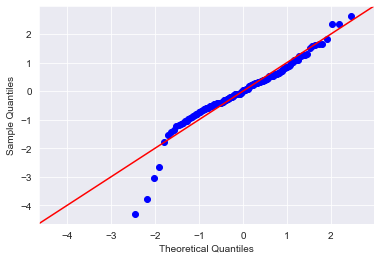

In [301]:
# Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

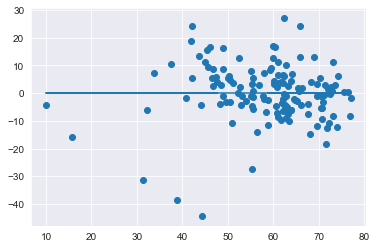

In [304]:
# Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

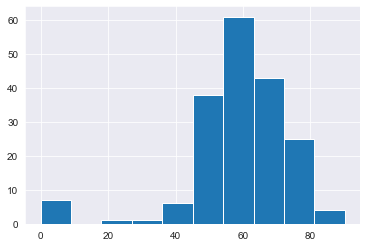

In [305]:
# Check for outliers
data.Score.hist()

In [253]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, data.Score.quantile(q=q)))

0.8 percentile: 68.7
0.81 percentile: 69.42500000000001
0.82 percentile: 70.82
0.83 percentile: 71.1
0.84 percentile: 72.03999999999999
0.85 percentile: 72.375
0.86 percentile: 72.82
0.87 percentile: 73.0
0.88 percentile: 73.66
0.89 percentile: 74.13
0.9 percentile: 75.05000000000001
0.91 percentile: 75.575
0.92 percentile: 76.04000000000002
0.93 percentile: 76.705
0.94 percentile: 76.8
0.95 percentile: 77.25
0.96 percentile: 77.66
0.97 percentile: 79.61999999999998
0.98 percentile: 81.19999999999999
0.99 percentile: 85.15000000000003


In [306]:
for i in range(0,10):
    q = i/100
    print("{} percentile: {}".format(q, data.Score.quantile(q=q)))

0.0 percentile: 0.0
0.01 percentile: 0.0
0.02 percentile: 0.0
0.03 percentile: 3.244999999999999
0.04 percentile: 26.66
0.05 percentile: 39.099999999999994
0.06 percentile: 40.46
0.07 percentile: 42.235
0.08 percentile: 45.800000000000004
0.09 percentile: 47.03


In [308]:
orig_tot = len(data)
# need to edit code to match numbers
data = data[data.Score < 85] # Subsetting to remove extreme outliers

print('Percent removed:', (orig_tot -len(data))/orig_tot)

# data.Score = data.Score.map(np.log) # Applying a log transformation
# train, test = train_test_split(data)

Percent removed: 0.010752688172043012


In [309]:
orig_tot = len(data)
# need to edit code to match numbers
data = data[data.Score > 0] # Subsetting to remove extreme outliers

print('Percent removed:', (orig_tot -len(data))/orig_tot)

# data.Score = data.Score.map(np.log) # Applying a log transformation
# train, test = train_test_split(data)

Percent removed: 0.03260869565217391


In [313]:
orig_tot = len(data)
# need to edit code to match numbers
data = data[data.Score > 0] # Subsetting to remove extreme outliers

print('Percent removed:', (orig_tot -len(data))/orig_tot)

# data.Score = data.Score.map(np.log) # Applying a log transformation
# train, test = train_test_split(data)

Percent removed: 0.0


In [314]:
data

,CountryName,Score,PropertyRights,JudicalEffectiveness,GovernmentIntegrity,TaxBurden,GovtSpending,FiscalHealth,BusinessFreedom,LaborFreedom,...,IncomeTaxRateprc,CorporateTaxRateprc,TaxBurdenprcofGDP,GovtExpenditureprcofGDP,PopulationMillions,GDPBillionsPPP,YearGDPGrowthRate,GDPperCapitaPPP,Unemploymentprc,Inflationprc
6,"Korea, North",5.9,31.6,5.0,24.4,0.0,0.0,0.0,5.0,5.0,...,0.0,0.0,0.0,100.0,25.4,40.0,0.0,1700.0,4.8,0.0
7,Venezuela,25.9,7.6,13.1,7.9,74.7,58.1,17.6,33.9,28.0,...,34.0,34.0,14.9,37.4,31.4,380.7,-7.8,12114.0,7.7,1087.5
8,Cuba,27.8,31.6,10.0,37.7,48.8,0.0,15.6,20.0,20.0,...,50.0,30.0,41.5,64.2,11.5,148.0,1.9,12920.0,2.6,5.5
9,Eritrea,38.9,35.5,18.1,19.7,81.4,73.9,0.0,17.7,70.0,...,30.0,30.0,8.0,29.5,5.9,9.4,3.4,1581.0,6.4,9.0
10,"Congo, Republic of",39.7,33.2,29.6,25.3,59.5,40.6,0.0,38.2,35.8,...,45.0,34.0,29.5,44.5,4.3,28.9,1.1,6642.0,11.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,United Kingdom,78.9,92.3,85.9,83.8,64.7,48.2,68.6,92.9,73.5,...,45.0,20.0,33.2,41.6,66.1,2914.0,2.2,44118.0,4.3,2.7
180,Ireland,80.5,85.8,68.4,78.0,76.3,77.4,89.0,83.1,75.3,...,41.0,12.5,23.0,27.4,4.7,357.2,9.7,75538.0,6.4,0.3
181,Australia,80.9,79.1,86.5,79.9,62.8,60.1,86.2,88.3,84.1,...,45.0,30.0,28.2,36.5,24.8,1246.5,2.4,50334.0,5.6,2.0
182,Switzerland,81.9,85.3,82.0,88.0,70.5,64.8,96.3,75.4,72.5,...,40.0,24.0,27.8,34.3,8.4,517.2,1.6,61422.0,4.8,0.5


In [315]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     41.72
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           1.11e-22
Time:                        16:14:34   Log-Likelihood:                -521.35
No. Observations:                 139   AIC:                             1053.
Df Residuals:                     134   BIC:                             1067.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            36.2493      3.008     12.052      0.000      30.301      42.198
FiscalHealth          0.2040      0.030      6.846      0.000       0.145       0.263
TariffRateprc        -0.5231      0.160     -3.272      0.001      -0.839      -0.207
TaxBurdenprcofGDP     0.4295      0.090      4.789      0.000       0.252       0.607
YearGDPGrowthRate     1.1388      0.296      3.843      0.000       0.553       1.725
==============================================================================
Omnibus:                       31.464   Durbin-Watson:                   2.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.048
Skew:                          -0.850   Prob(JB):                     2.06e-19
Kurtosis:                       6.459   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

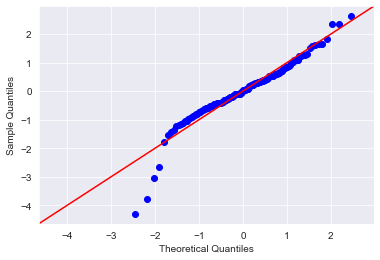

In [316]:
# Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [319]:
data.Score.sort_values()

6       5.9
7      25.9
8      27.8
9      38.9
10     39.7
       ... 
179    78.9
180    80.5
181    80.9
182    81.9
183    84.4
Name: Score, Length: 178, dtype: float64

In [320]:
orig_tot = len(data)
# need to edit code to match numbers
data = data[data.Score > 6] # Subsetting to remove extreme outliers

print('Percent removed:', (orig_tot -len(data))/orig_tot)

# data.Score = data.Score.map(np.log) # Applying a log transformation
# train, test = train_test_split(data)

Percent removed: 0.0056179775280898875


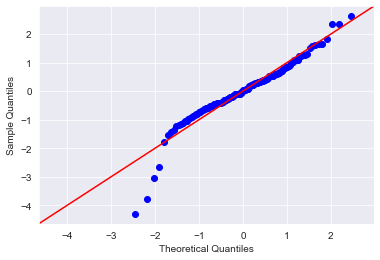

In [321]:
# Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [322]:
data.Score.min

<bound method Series.min of 7      25.9
8      27.8
9      38.9
10     39.7
11     40.4
       ... 
179    78.9
180    80.5
181    80.9
182    81.9
183    84.4
Name: Score, Length: 177, dtype: float64>

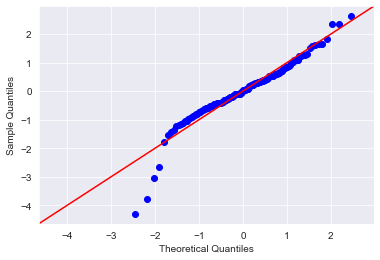

In [323]:
# Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

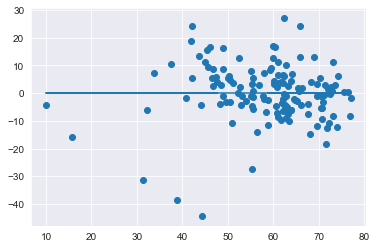

In [324]:
# Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 68.68
0.81 percentile: 69.28
0.82 percentile: 70.592
0.83 percentile: 71.1
0.84 percentile: 71.856
0.85 percentile: 72.22
0.86 percentile: 72.672
0.87 percentile: 73.0
0.88 percentile: 73.44
0.89 percentile: 73.89200000000001
0.9 percentile: 74.48
0.91 percentile: 75.232
0.92 percentile: 75.86000000000001
0.93 percentile: 76.376
0.94 percentile: 76.744
0.95 percentile: 76.86
0.96 percentile: 77.292
0.97 percentile: 77.672
0.98 percentile: 79.66799999999998
0.99 percentile: 81.14000000000001


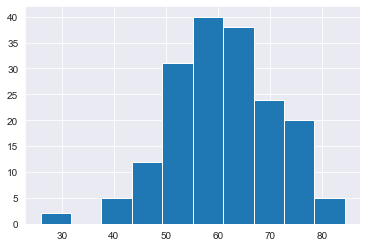

In [327]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, data.Score.quantile(q=q)))

data.Score.hist()

In [328]:
orig_tot = len(data)
# need to edit code to match numbers
data = data[data.Score > 30] # Subsetting to remove extreme outliers

print('Percent removed:', (orig_tot -len(data))/orig_tot)

# data.Score = data.Score.map(np.log) # Applying a log transformation
# train, test = train_test_split(data)

Percent removed: 0.011299435028248588


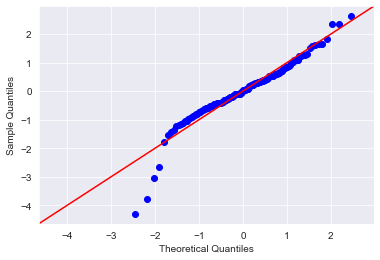

In [329]:
# Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [330]:
data.Score.min

<bound method Series.min of 9      38.9
10     39.7
11     40.4
12     41.0
13     42.3
       ... 
179    78.9
180    80.5
181    80.9
182    81.9
183    84.4
Name: Score, Length: 175, dtype: float64>

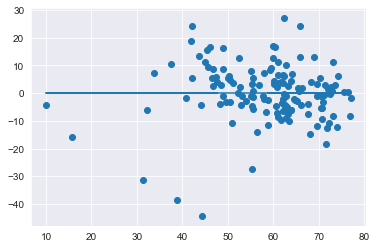

In [331]:
# Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

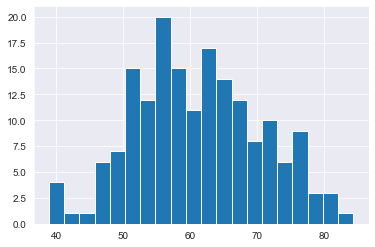

In [338]:
data.Score.hist(bins=20)

In [339]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     41.72
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           1.11e-22
Time:                        16:29:29   Log-Likelihood:                -521.35
No. Observations:                 139   AIC:                             1053.
Df Residuals:                     134   BIC:                             1067.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            36.2493      3.008     12.052      0.000      30.301      42.198
FiscalHealth          0.2040      0.030      6.846      0.000       0.145       0.263
TariffRateprc        -0.5231      0.160     -3.272      0.001      -0.839      -0.207
TaxBurdenprcofGDP     0.4295      0.090      4.789      0.000       0.252       0.607
YearGDPGrowthRate     1.1388      0.296      3.843      0.000       0.553       1.725
==============================================================================
Omnibus:                       31.464   Durbin-Watson:                   2.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.048
Skew:                          -0.850   Prob(JB):                     2.06e-19
Kurtosis:                       6.459   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [341]:
# need to edit this code
data = data[data.Score <= 85]
train, test = train_test_split(data)

In [342]:
data

,CountryName,Score,PropertyRights,JudicalEffectiveness,GovernmentIntegrity,TaxBurden,GovtSpending,FiscalHealth,BusinessFreedom,LaborFreedom,...,IncomeTaxRateprc,CorporateTaxRateprc,TaxBurdenprcofGDP,GovtExpenditureprcofGDP,PopulationMillions,GDPBillionsPPP,YearGDPGrowthRate,GDPperCapitaPPP,Unemploymentprc,Inflationprc
9,Eritrea,38.9,35.5,18.1,19.7,81.4,73.9,0.0,17.7,70.0,...,30.0,30.0,8.0,29.5,5.9,9.4,3.4,1581.0,6.4,9.0
10,"Congo, Republic of",39.7,33.2,29.6,25.3,59.5,40.6,0.0,38.2,35.8,...,45.0,34.0,29.5,44.5,4.3,28.9,1.1,6642.0,11.0,0.5
11,Zimbabwe,40.4,29.7,24.8,15.8,62.3,74.5,23.7,33.4,43.3,...,51.5,25.0,22.3,29.2,14.9,34.0,2.6,2283.0,5.0,1.3
12,Equatorial Guinea,41.0,29.7,18.1,15.8,71.3,67.6,16.4,37.6,32.7,...,35.0,35.0,20.4,32.8,0.8,30.4,-5.6,36017.0,6.9,0.7
13,Bolivia,42.3,20.5,12.3,19.7,82.4,49.3,17.6,58.8,52.9,...,13.0,25.0,31.1,41.1,11.1,83.6,5.1,7547.0,3.1,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,United Kingdom,78.9,92.3,85.9,83.8,64.7,48.2,68.6,92.9,73.5,...,45.0,20.0,33.2,41.6,66.1,2914.0,2.2,44118.0,4.3,2.7
180,Ireland,80.5,85.8,68.4,78.0,76.3,77.4,89.0,83.1,75.3,...,41.0,12.5,23.0,27.4,4.7,357.2,9.7,75538.0,6.4,0.3
181,Australia,80.9,79.1,86.5,79.9,62.8,60.1,86.2,88.3,84.1,...,45.0,30.0,28.2,36.5,24.8,1246.5,2.4,50334.0,5.6,2.0
182,Switzerland,81.9,85.3,82.0,88.0,70.5,64.8,96.3,75.4,72.5,...,40.0,24.0,27.8,34.3,8.4,517.2,1.6,61422.0,4.8,0.5


In [343]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     36.39
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           3.39e-20
Time:                        16:51:25   Log-Likelihood:                -428.05
No. Observations:                 131   AIC:                             866.1
Df Residuals:                     126   BIC:                             880.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            52.6472      2.648     19.883      0.000      47.407      57.887
FiscalHealth          0.1309      0.019      6.879      0.000       0.093       0.169
TariffRateprc        -0.8124      0.139     -5.863      0.000      -1.087      -0.538
TaxBurdenprcofGDP     0.2230      0.065      3.412      0.001       0.094       0.352
YearGDPGrowthRate    -0.1771      0.267     -0.664      0.508      -0.705       0.351
==============================================================================
Omnibus:                        2.154   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.738
Skew:                          -0.270   Prob(JB):                        0.419
Kurtosis:                       3.165   Cond. No.                         365.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

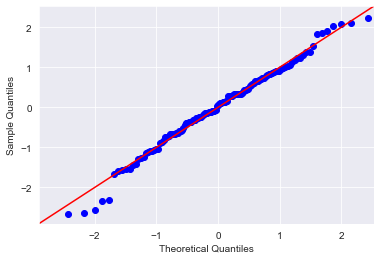

In [344]:
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

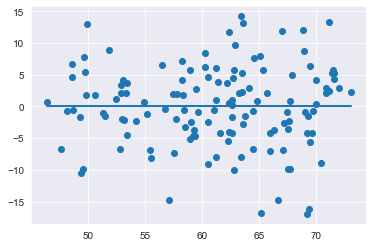

In [345]:
# Check the Homoscedasticity Assumption

plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [346]:
# Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

5 3
['FiscalHealth', 'TariffRateprc', 'TaxBurdenprcofGDP']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,52.6472,2.648,19.883,0.000,47.407,57.887
FiscalHealth,0.1309,0.019,6.879,0.000,0.093,0.169
TariffRateprc,-0.8124,0.139,-5.863,0.000,-1.087,-0.538
TaxBurdenprcofGDP,0.2230,0.065,3.412,0.001,0.094,0.352
YearGDPGrowthRate,-0.1771,0.267,-0.664,0.508,-0.705,0.351


In [347]:
# Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     48.59
Date:                Wed, 15 Jan 2020   Prob (F-statistic):           5.52e-21
Time:                        16:56:08   Log-Likelihood:                -428.27
No. Observations:                 131   AIC:                             864.5
Df Residuals:                     127   BIC:                             876.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            51.7780      2.296     22.549      0.000      47.234      56.322
FiscalHealth          0.1298      0.019      6.863      0.000       0.092       0.167
TariffRateprc        -0.8025      0.137     -5.838      0.000      -1.074      -0.530
TaxBurdenprcofGDP     0.2374      0.062      3.857      0.000       0.116       0.359
==============================================================================
Omnibus:                        1.843   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.417
Skew:                          -0.236   Prob(JB):                        0.492
Kurtosis:                       3.191   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
need to run the same things for the test data

In [ ]:
# Fitting the testing data
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

In [ ]:
# Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

In [ ]:
# Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

In [ ]:
# Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

In [ ]:
# Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

In [ ]:
# Code a way to identify multicollinearity
X = int_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

In [ ]:
# Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

In [ ]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

In [ ]:
# Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
# Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [ ]:
# Check for outliers
int_df.list_price.hist()

In [ ]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, int_df.list_price.quantile(q=q)))

In [ ]:
orig_tot = len(int_df)
# need to edit code to match numbers
int_df = int_df[int_df.list_price < 450] # Subsetting to remove extreme outliers

print('Percent removed:', (orig_tot -len(int_df))/orig_tot)

int_df.list_price = int_df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(int_df)

In [ ]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

In [ ]:
# Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
# Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [ ]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, int_df.list_price.quantile(q=q)))

int_df.list_price.hist()

In [ ]:
# need to edit this code
int_df = int_df[int_df.list_price <= 6]
train, test = train_test_split(int_df)

In [ ]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

In [ ]:
# Check the Normality Assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [ ]:
# Check the Homoscedasticity Assumption

plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])